**Mini-Projeto(Reconhecimento de Dígitos)**

Grupo: João Paulo do Nascimento Borges e Jose Messias Marinho Olimpio

O reconhecimento de dígitos escritos a mão é um problema clássico de classificação na área de visão computacional. O problema consiste em receber uma imagem de um número escrito a mão, codificada em tons de cinza, e classificar o dígito decimal (0-9) ali contido. Para estudantes e pesquisadores das técnicas de aprendizado de máquina, o dataset MNIST, cujos exemplos de instâncias estão ilustrados na Figura 1, é utilizado para comparação de técnicas, competições e construções de novas soluções.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
test_file_path = './datasets/test.csv'
train_file_path = './datasets/train.csv'
test_df = pd.read_csv(test_file_path)
train_df = pd.read_csv(train_file_path)

np_train_df = train_df.to_numpy()[:, 1:]
np_test_df = test_df.to_numpy()[:, 1:]

DIGIT = 0
FIRST_PIXEL = 1

### Modelos de Aprendizagem

**PERCEPTRON**

In [3]:
class Perceptron:
  def __init__(self, max_iter):
    self.max_iter = max_iter

  def fit(self, _X, _y):
    dimension = len(_X[0])
    self.w = 2 * np.random.random(size=dimension) - 1
    self.best_error = dimension
    best_w = self.w
    
    for i in range(self.max_iter):

      for x_n, y_n in zip(_X, _y):
        y_pred = np.sign(np.dot(x_n, self.w))

        if y_pred != y_n:
          self.w = self.w + x_n * y_n
          error = self.__error_in(zip(_X, _y))
          if self.best_error > error:
            self.best_error = error
            best = self.w
      
      self.w = best_w

  def predict(self, x_test, first_digit, second_digit):
    y_pred = np.sign(np.dot(x_test, self.w))
    return np.where(y_pred == -1.0, first_digit, second_digit)


  def get_w(self):
    return self.w
    
  # Private

  def __error_in(self, points):
    error = 0

    for x_n, y_n in points:
      y_pred = np.sign(np.dot(x_n, self.w))
      error += 1 if y_pred != y_n else 0

    return error

**LINEAR REGRESSION**

In [14]:
class LinearRegression:
  def fit(self, _X, _y):
      X =  np.array(_X)
      y =  np.array(_y)
      xTx = np.dot(X.transpose(), X)
      inverse = np.linalg.inv(xTx)
      self.w = np.dot(np.dot( inverse, X.transpose()), y)
    
  def predict(self, _x, first_digit, second_digit):
      y_pred = [np.dot(self.w, x_n) for x_n in _x]
      return y_pred
    #   return [first_digit if y_n > 0.5 else second_digit for y_n in y_pred]
    
  def get_w(self):
      return self.w

**LOGISTIC REGRESSION**

In [5]:
class LogisticRegression:
  def __init__(self, eta=0.1, tmax=2, bs=1000000):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = bs

  def fit(self, _X, _y, epsilon=0.0001):
    X = np.array(_X)
    y = np.array(_y)

    N = X.shape[0]
    d = X.shape[1]
    w = np.zeros(d)

    self.w = []

    for t in range(self.tmax):
      values_sum = 0.0

      for n in range(N):
        yN_wT = y[n] * np.transpose(w)
        values_sum += y[n] * X[n] /( 1 + np.exp(np.inner(yN_wT, X[n])) )

      gT = - ( values_sum / N )

      if(np.linalg.norm(gT) < epsilon): break

      w = w - (self.eta * gT)

    self.w = w    
    
  # funcao hipotese inferida pela regressa logistica  
  def predict_prob(self, X):
    return [ 1 / (1 - np.exp(-(self.__hypothesis_function(x)))) for x in X]

  # Predicao por classificação linear
  def predict(self, X):
    return [ 1 if(1 - np.exp(-(self.__hypothesis_function(x))) >= 0.5) else -1 for x in X]

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

  # Private Methods

  def __hypothesis_function(self, x):
    return np.dot(np.transpose(self.w), x) 

### Funções utilitárias

In [6]:
def pos_pixel(size, i ,j):
  return i*size + j

def symmetry(image):
  size = 28
  sv = 0
  sh = 0
  
  for i in range(size):
    for j in range(int(size/2)):
      p1 = image[pos_pixel(size, i, j)]
      p2 = image[pos_pixel(size, i, (size-1)-j)]
      sv += abs(p1 - p2)
            
      p1 = image[pos_pixel(size, j, i)]
      p2 = image[pos_pixel(size, (size-1)-j, i)]
      sh += abs(p1 - p2)

  sv = sv/255
  sh = sh/255

  s = sv + sh
  
  return s
  
def intensity(image):
  return (np.sum(image)/255.0)


def get_numbers_1_and_5(df):
  filtered_data = []

  for item in df:
    if(item[0] == 1 or item[0] == 5):
      filtered_data.append(item.tolist())

  return filtered_data
  

In [43]:
def plot_linear_classifier(x_train, y_train, x_test, y_pred):
  first_digit = []
  second_digit = []

  for x_n, y_n in zip(x_train, y_train):
    if y_n == -1:
      first_digit.append(x_n)
    else:
      second_digit.append(x_n)

  first_digit = np.array(first_digit)
  second_digit = np.array(second_digit)

  plt.scatter(first_digit[:, 0], first_digit[:, -1], color='blue')
  plt.scatter(second_digit[:, 0], second_digit[:, -1], color='red')

  # plt.plot(x_test, y_pred, color='k')

### Classificação dos números 1 e 5

Dados de treinamento

In [8]:
new_train_df = []
images = get_numbers_1_and_5(np_train_df)

for image in images:
  symmetry_ = symmetry(image[FIRST_PIXEL:])
  intensity_ = intensity(image[FIRST_PIXEL:])

  label = -1 if image[DIGIT] == 1 else 1

  new_train_df.append([label, intensity_, symmetry_])

new_train_df = np.array(new_train_df)

Dados de teste

In [9]:
new_test_df = []
images = get_numbers_1_and_5(np_test_df)

for image in images:
  symmetry_ = symmetry(image[FIRST_PIXEL:])
  intensity_ = intensity(image[FIRST_PIXEL:])

  label = -1 if image[DIGIT] == 1 else 1

  new_test_df.append([label, intensity_, symmetry_,])

new_test_df = np.array(new_test_df)

In [13]:
# PERCEPTRON

pla = Perceptron(10)
pla.fit(new_train_df[:, 1:], new_train_df[:, 0])

In [23]:
# LINEAR REGRESSION

lr = LinearRegression()
lr.fit(new_train_df[:, 1:], new_train_df[:, 0])

In [17]:
# LOGISTIC REGRESSION

log_r = LogisticRegression()
X = np.array([ [1, *item] for item in new_train_df[:, 1:] ])
log_r.fit(X, new_train_df[:, 0])

### Gráficos

**PERCEPTRON**

In [64]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

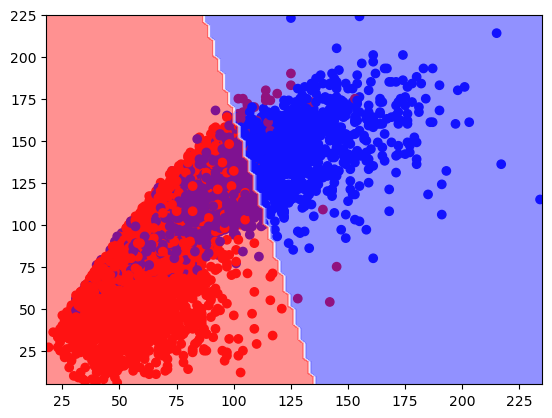

In [10]:
plot_linear_classifier(new_train_df[:, 1:], new_train_df[:, 0], pla.weights, pla.bias)

**Matriz  de confusão**

In [18]:
confusion_matrix(new_test_df[:, 0], lr.predict(new_test_df[:, 1:]))

[[ 216 1108]
 [   7 1521]]


In [18]:
print(classification_report(new_test_df[:, 0], pla.predict(new_test_df[:, 1:], 1, 5)))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1528
         1.0       0.46      1.00      0.63      1324

    accuracy                           0.46      2852
   macro avg       0.23      0.50      0.32      2852
weighted avg       0.22      0.46      0.29      2852



/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

**REGRESSÃO LINEAR**

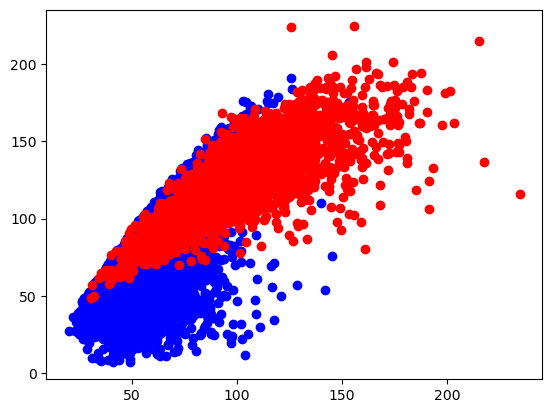

In [44]:
x_train, y_train = new_train_df[:, 1:], new_train_df[:, 0]
x_test = new_test_df[:, 1:]

plot_linear_classifier(x_train, y_train, x_test, lr.predict(x_test, 1, 5))

**Matriz de confusão**

In [44]:
x = new_test_df[:, 1:]
print(confusion_matrix(x, lr.predict(x)))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

In [12]:
y_pred = lr.predict(new_test_df[:, 1:], 1, 5)

print(classification_report(new_test_df[:, 0], y_pred))

[0.17124098838317803, 0.06399063092484711, 0.22228594114406325, 0.08771940560915374, 0.09905342195262815, 0.185888361329055, 0.07821421606122705, 0.14272308797564906, 0.11411547960354529, 0.04471771654165785, 0.11695008489405198, 0.04999532533752421, 0.16068517183988323, 0.17539840163515572, 0.08501886432545991, 0.15806167639573881, 0.11376934280390688, 0.09596990846774534, 0.1863162905455151, 0.1982059195933124, 0.08424674784260416, 0.17024253764486633, 0.15790237608799326, 0.19364449744819934, 0.058196820600872126, 0.13599575961764337, 0.18912358021917286, 0.18891131605841036, 0.09202371559846295, 0.17909390520650742, 0.10974798931951593, 0.07515400606353577, 0.1862314982476026, 0.12782231694559804, 0.08113248126275918, 0.129338991799649, 0.20003581547768073, 0.13234210633604732, 0.15388460168454704, 0.13668862489663403, 0.11094681503386036, 0.10647306558913197, 0.12730083727202912, 0.16313806558265817, 0.1659388059990096, 0.06189764030499708, 0.136727698399436, 0.1727216604941006, 0

/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**REGRESSÃO LOGÍSTICA**

In [65]:
log_r.getW()

array([ 0.        , -0.0324043 , -0.03179721])

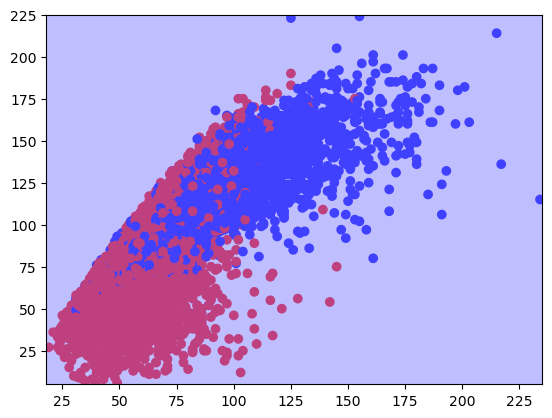

In [22]:
plot_linear_classifier(new_train_df[:, 1:], new_train_df[:, 0], log_r.getW()[1:], log_r.getW()[0])

**Matriz  de confusão**

In [24]:
ones = np.ones((new_test_df.shape[0],1))
X = np.hstack((ones, new_test_df[:, 1:]))

In [24]:
print(confusion_matrix(new_test_df[:, 0], log_r.predict(X)))

[[   0 1324]
 [   0 1528]]


In [25]:
print(classification_report(new_test_df[:, 0], log_r.predict(X)))

              precision    recall  f1-score   support

        -1.0       0.54      1.00      0.70      1528
         1.0       0.00      0.00      0.00      1324

    accuracy                           0.54      2852
   macro avg       0.27      0.50      0.35      2852
weighted avg       0.29      0.54      0.37      2852



/tmp/ipykernel_9561/2302325224.py:38: RuntimeWarning: overflow encountered in exp
  return [ 1 if(1 - np.exp(-(self.__hypothesis_function(x))) >= 0.5) else -1 for x in X]
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/messias/miniconda3/envs/ufpb/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are il

### Classificação de todos os dígitos

Dados de treinamento

In [62]:
new_train_df = []

for image in np_train_df:
  symmetry_ = symmetry(image[FIRST_PIXEL:])
  intensity_ = intensity(image[FIRST_PIXEL:])

  new_train_df.append([image[DIGIT], symmetry_, intensity_])

new_train_df = np.array(new_train_df)

Dados de teste

In [63]:
new_test_df = []

for image in np_test_df:
  symmetry_ = symmetry(image[FIRST_PIXEL:])
  intensity_ = intensity(image[FIRST_PIXEL:])

  new_test_df.append([image[DIGIT], symmetry_, intensity_])

new_test_df = np.array(new_test_df)